In [1]:
#Importing Libraries for data analysis

# Call data manipulation libraries
import pandas as pd
import numpy as np

# Plotting libraries to plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns

# Misc
import os, time, warnings

# Execution of HTTP requests librarie
import requests

# extracting data in HTML and XML files librarie
from bs4 import BeautifulSoup

In [1]:
# Method to extract pages at once in NBA site
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extracting year {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df

# Request datas in HTML pages:
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2018)

# Clean and Transform dataframe 
drop_indexes = df[df['Rk'] == 'Rk'].index # Get indexes where the 'Rk' column has a value of 'Rk'
df.drop(drop_indexes, inplace=True) # Delete the values of the indexes passed from the table

# Converting tables to numeric values
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

NameError: name 'pd' is not defined

In [3]:
df.head() # Data preview 5 rows

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,...,30,47,77,11,13,15,17,53,116,2013
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,...,68,128,196,36,18,27,32,80,209,2013
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,...,29,210,239,206,40,11,138,137,1057,2013
3,4,Josh Akognon,PG,26,DAL,3,0,9,2,4,...,0,1,1,1,0,0,0,3,5,2013
4,5,Cole Aldrich,C,24,TOT,45,0,388,44,80,...,30,90,120,9,5,23,23,60,100,2013


C:\Users\guilh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


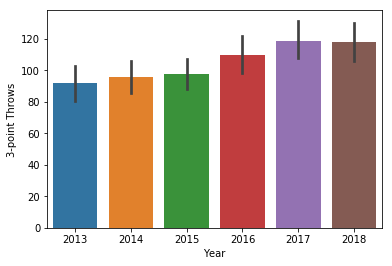

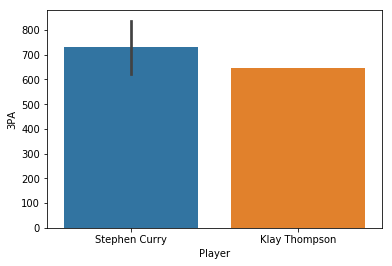

In [11]:
# Average chart of 3-point throws per year
sns.barplot(x=df['Year'], y=df['3PA'])
plt.ylabel('3-point Throws')
plt.show()

# ----------

# Sort Data Frame by 3 point ball converted in descending order
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)

# Show the first five player
sorted_df[['Player', '3P', 'Year']].head()

# Grouping the data per player and adding the values
grouped_df = df.groupby('Player', as_index=False).sum()

# Sort Data Frame by 3-point converted balls in descending order
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)

# Shows 5 first positions of the table
a = sorted_df[['Player', '3P', '3PA']].head()
sns.barplot(x=a['Player'], y=a['3PA'])